In [1]:
import numpy as np

In [2]:
x = var("x")

### Точки, по которым строится сплайн:

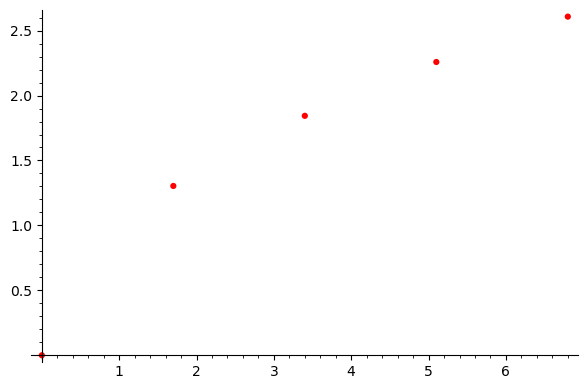

In [5]:
pts = [[0,0],
       [1.7,1.3038],
       [3.4,1.8439],
       [5.1,2.2583],
       [6.8,2.6077]]

plt = point(pts[0],color = "red",size = 20)
for i in range(1, len(pts)):
    plt += point(pts[i],color = "red",size = 20) 
show(plt)

In [51]:
def SplineCube(pts):
    h = []
    for i in range(1,len(pts)):
        h.append(pts[i][0] - pts[i-1][0])
    ptsA = np.array(pts)
    f = ptsA[:,1]
    n = len(pts) - 2 

    names = "" #инициализация переменных
    for i in range (len(pts) - 1):
        names += "с" + (str(i)) + " "
    c = var(names)
    
    #построение системы уравнений
    eqs = [c[0] == 0, 2*(h[0] + h[1])*c[1] + h[1]*c[2] == 3*((f[2]-f[1])/h[1] - (f[1]-f[0])/h[0])]

    for i in range(2, n):
        eqs.append(h[i-1]*c[i-1] + 2*(h[i-1]+h[i])*c[i] + h[i]*c[i+1] == 3*((f[i+1]-f[i])/h[i] - (f[i]-f[i-1])/h[i-1]))

    eqs.append(h[n-1]*c[n-1] + 2*(h[n-1]+h[n])*c[n] == 3*((f[n+1]-f[n])/h[n] - (f[n]-f[n-1])/h[n-1]))
    
    sols = solve(eqs,c) # решение системы уравнений
    
    C  = []
    for a in sols[0]:
        C.append(a.rhs()) #сборка решений в массив C 
        
    #отыскание остальных коэфициентов
    a = []
    b = []
    d = []

    for i in range(1,len(pts)):
        a.append(pts[i-1][1])

        if (i < len(pts) - 1):
            
            b.append((pts[i][1] - pts[i-1][1])/h[i-1] - (1/3)*(h[i-1]*(C[i] + 2*C[i-1])))
            d.append((C[i] - C[i-1])/(3*h[i-1]))
        else:
            b.append((pts[i][1] - pts[i-1][1])/h[i-1] - (2/3)*(h[i-1]*C[i-1]))
            d.append((- C[i-1])/(3*h[i-1]))
            
    #построение систмы функций
    func= []
    for i in range(len(pts) - 1):
        func.append(a[i] + b[i]*(x - pts[i][0])**1+ C[i].n()*(x - pts[i][0])**2 + d[i]*(x - pts[i][0])**3)
    
    return func

In [15]:
def formt_for_show(pts):
    res = []
    for a in pts:
        res.append((a[0].n(digits = 2),a[1].n(digits = 2)))
    return res 

def points_to_plot(pts):
    pl = point(pts[0],color = "red",size = 20)
    for i in range(1,len(pts)):
        pl += point(pts[i],color = "red",size = 20)
    return pl

def spline_to_plot(splfnc,pts): #собирает из системы функций сплайна готовый график
    pltf = plot(func[0],xmin = pts[0][0],xmax = pts[1][0])
    for i in range(1,len(pts) -1):
        pltf += plot(splfnc[i],xmin = pts[i][0],xmax = pts[i+1][0])
    return pltf

In [54]:
func = SplineCube(pts)
spl = spline_to_plot(func,pts)

In [55]:
for a in func:
    show(a)

-0.0400457241720218*x^3 + 0.882673319327731*x

0.0447838824110959*(x - 1.70000000000000)^3 - 0.204233193277311*(x - 1.70000000000000)^2 + 0.535476890756303*x + 0.393489285714286

-0.00923024919310288*(x - 3.40000000000000)^3 + 0.0241646070192783*(x - 3.40000000000000)^2 + 0.229360294117647*x + 1.06407500000000

0.00449209095402870*(x - 5.10000000000000)^3 - 0.0229096638655464*(x - 5.10000000000000)^2 + 0.231493697478992*x + 1.07768214285714

'Сплайн по точкам: [(0.00, 0.00), (1.7, 1.3), (3.4, 1.8), (5.1, 2.3), (6.8, 2.6)]'

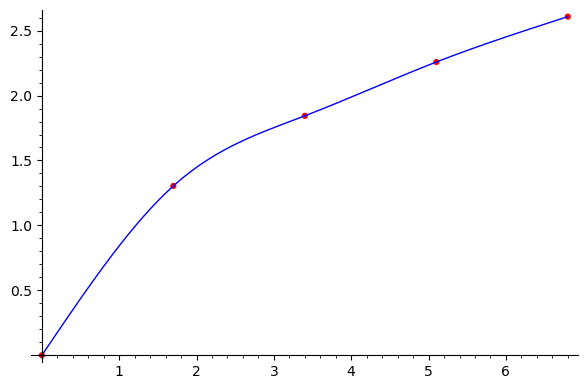

'Без точек, чтобы гладкость была наблюдаема:'

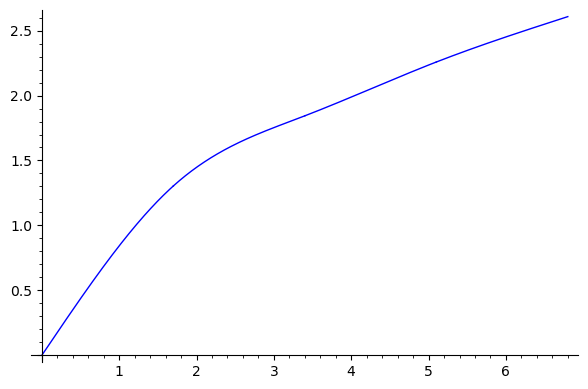

In [56]:
show("Сплайн по точкам: {}".format(formt_for_show(pts)))
show(spl + points_to_plot(pts)) 
show("Без точек, чтобы гладкость была наблюдаема:")
show(spl) 

### Поиск значения функции в точке X*

In [57]:
def val_of_spline(funcsys,pts,pt): #вычисление значения сплайна от точки
    for i in range(len(pts) - 1):
        if(pts[i][0] < pt and pts[i + 1][0] >= pt):
            return funcsys[i](x = pt)
    else:
        return false

In [58]:
ptx = 3.0
ptval = val_of_spline(func,pts,ptx)

'Значение сплайна в точке X* = 3.0 равно 1.753'

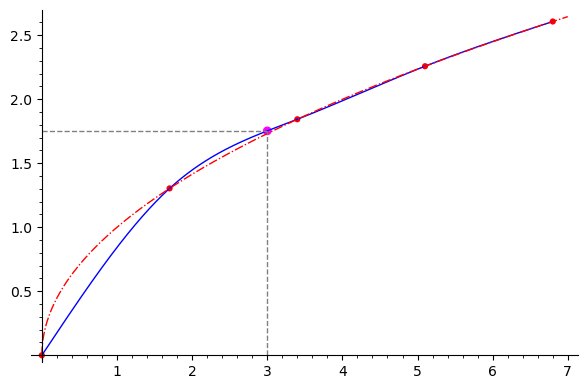

In [59]:
show("Значение сплайна в точке X* = {} равно {}".format(ptx.n(digits = 2),ptval.n(digits = 4)))

show(spl + 
#     plot(Lagrange(pts),color = "green",xmin = 0,xmax = 7) +
     points_to_plot(pts) +
     plot(sqrt(x),xmin = 0,xmax = 7,color = "red",linestyle = "-.")+
     point((ptx,ptval),size = 40,color = "magenta") +
     line([(ptx,0),(ptx,ptval)],color = "grey", linestyle = "--") + 
     line([(0,ptval),(ptx,ptval)],color = "grey", linestyle = "--")) 

### Проверка работоспособности функции построения сплайна для более сложных систем точек

In [60]:
ptsET = [[0,0],
       [1.7,1.3038],
       [3.1,1.8439],
       [5.4,2.2583],
       [6.8,2.6077],
       [7,2.177],
       [7.1,5.6077],
       [7.9,1.6077],
       [8.1,-1.6077],
       [9,7.6077],
       [9.1,1.6077]]

In [61]:
funcl = SplineCube(ptsET)
spl = spline_to_plot(funcl,ptsET)

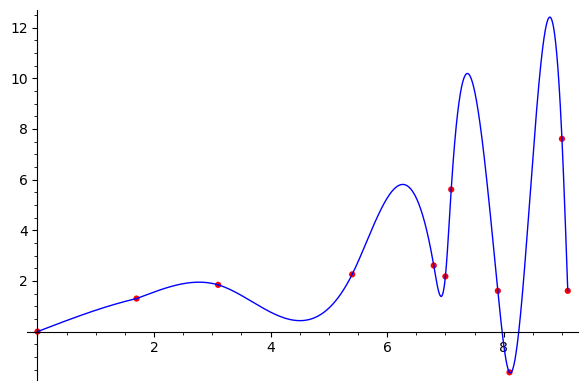

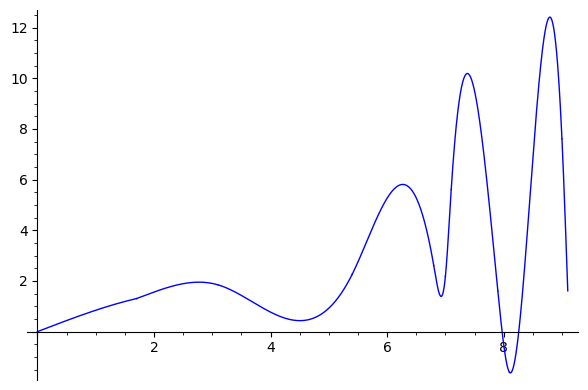

In [62]:
show(spl + points_to_plot(ptsET)) 
show(spl) 